In [2]:
import matplotlib.pyplot as plt
import numpy as np

from astropy.io import fits

from ciao_contrib.runtool import *

# Imaging the Supernova Remnant N63A

Read all about this supernova remnant here: 
 - https://chandra.harvard.edu/photo/2003/n63a/
 
## Dataset: 
 - Chandra OBSID 777 
    - early-mission ACIS-S observation, no gratings

## Goals for the Notebook:
 - get header information from fits file
 - create images of the supernova remnant 
   - energy-filtered images 
 - create contours of the X-ray image 
   - smoothing images two ways 
   - overlay contours on X-ray images 
   - overlay contours on optical images 

## Tools used: 
 - download_chandra_obsid, chandra_repro (not shown) 
 - dmcopy: used to create energy filtered images 
 - csmooth: used to smooth images 
 - astropy.io.fits: used to open fits files 
 - astropy.wcs.WCS: used to access the fits file's WorldCoordinateSystem 
 - matplotlib.pyplot.imshow: used to display images 
 - matplotlib.pyplot.contour: used to create and display contours 
 
*Helpful tip: use toolname? or toolname?? to view the script docstring and code, respectively.*



### Getting Started 

I have already downloaded the observation and used *chandra_repro* to reprocess the observation. 

I can view the observation folder to find the files. 

In [3]:
ls 777/

00README                      primary/
axaff00777N002_VV001_vv2.pdf  repro/
oif.fits                      secondary/


In [4]:
ls 777/repro

acisf00777_000N004_bpix1.fits  acisf00777_repro_bpix1.fits
acisf00777_000N004_fov1.fits   acisf00777_repro_evt2.fits
acisf00777_000N004_msk1.fits   acisf00777_repro_flt2.fits
acisf00777_000N004_mtl1.fits   acisf00777_repro_fov1.fits
acisf00777_000N004_stat1.fits  acisf088116508N004_pbk0.fits
acisf00777_asol1.lis           pcadf088115739N004_asol1.fits


In [5]:
# storing the file in a variable for ease: 
filename = '777/repro/acisf00777_repro_evt2.fits'

### Viewing Header Information 

In [6]:
# using dmlist to view header
dmlist(filename,'header')

 
--------------------------------------------------------------------------------
Header keys for block EVENTS
--------------------------------------------------------------------------------
 
 --  COMMENT                                            +------------------+
 --  COMMENT                                            | AXAF FITS   File |
 --  COMMENT                                            +------------------+
 --  COMMENT               *********************************************************
 --  COMMENT               >    This file is written following certain AXAF-ASC    <
 --  COMMENT               >    conventions which are documented in ASC-FITS-2.0   <
 --  COMMENT               *********************************************************
 --  COMMENT                                     / Configuration control block--------------------
0001 ASOLFILE             pcadf088115739N004_asol1.fits  String       
0002 THRFILE              acisD1996-11-01evtspltN0002.fits Strin

In [7]:
# dmkeypar to view particular header keywork
dmkeypar(filename,'EXPOSURE',echo=True)

43353.036782741

In [8]:
# you can query a list of header keywords 
# useful for querying a large number of obsids 
basic_info = ['INSTRUME','DATE-OBS','EXPOSURE']
for i in basic_info: 
    print(i,dmkeypar(filename,i,echo=True))


INSTRUME ACIS
DATE-OBS 2000-10-16T20:27:02
EXPOSURE 43353.036782741


In [9]:
# Alternatively, we could do similar things with astropy.io.fits package: 
evtfile = fits.open(filename)

In [10]:
print(evtfile.info())

Filename: 777/repro/acisf00777_repro_evt2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   ()      
  1  EVENTS        1 BinTableHDU   1029   1902331R x 20C   [1D, 1J, 1I, 1I, 1I, 1I, 1I, 1I, 1E, 1E, 1E, 1E, 9I, 1J, 1J, 1E, 1J, 1I, 1I, 32X]   
  2  GTI           7 BinTableHDU     28   2R x 2C   [1D, 1D]   
  3  GTI           2 BinTableHDU     28   2R x 2C   [1D, 1D]   
  4  GTI           5 BinTableHDU     28   2R x 2C   [1D, 1D]   
  5  GTI           6 BinTableHDU     28   2R x 2C   [1D, 1D]   
  6  GTI           3 BinTableHDU     28   2R x 2C   [1D, 1D]   
  7  GTI           8 BinTableHDU     28   2R x 2C   [1D, 1D]   
None


In [11]:
evtfile[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
HDUNAME = 'PRIMARY '                                                            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ORIGIN  = 'ASC     '           / Source of FITS file                            
CREATOR = 'acis_process_even

In [12]:
evtfile[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   82 / width of table in bytes                        
NAXIS2  =              1902331 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   20 / number of fields in each row                   
EXTNAME = 'EVENTS  '           / name of this binary table extension            
HDUNAME = 'EVENTS  '           / ASCDM block name                               
TTYPE1  = 'time    '           / S/C TT corresponding to mid-exposure           
TFORM1  = '1D      '           / format of field                                
TUNIT1  = 's       '        

In [13]:
basic_info = ['INSTRUME','DATE-OBS','EXPOSURE']
for i in basic_info: 
    print(i,evtfile[1].header[i])

INSTRUME ACIS
DATE-OBS 2000-10-16T20:27:02
EXPOSURE 43353.036782741


### Imaging the Event List

In [14]:
# source position: 
ra, dec = "5:35:43.8489", "-66:02:11.423"

In [15]:
# size of the desired region
image_size = "2.5'"

In [16]:
# define a region 
myregion = "rotbox({0},{1},{2},{2},0)".format(ra,dec,image_size)
print(myregion)

rotbox(5:35:43.8489,-66:02:11.423,2.5',2.5',0)


### First run of dmcopy to make a broad band image

In [17]:
# first test the infile parameter:
myinfile = filename+'[sky={0}]'.format(myregion)+'[energy={0}:{1}]'.format(300,8000)
print(myinfile)

777/repro/acisf00777_repro_evt2.fits[sky=rotbox(5:35:43.8489,-66:02:11.423,2.5',2.5',0)][energy=300:8000]


In [18]:
# looks good so use it:
dmcopy(infile=myinfile,
      outfile='n63a_brd_cropped_evt2.fits',
      clobber=True)

# since we didn't use the bin option, we still have an event list. To make a binned image, we use: 
dmcopy(infile=myinfile+'[bin x=::1,y=::1]',
      outfile='n63a_brd_cropped_img.fits',
      clobber=True)

In [19]:
# load image with astropy.io.fits
brd = fits.open('n63a_brd_cropped_img.fits')
print(brd.info())

Filename: n63a_brd_cropped_img.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1046   (305, 305)   int16   
  1  GTI           7 BinTableHDU     28   2R x 2C   [1D, 1D]   
  2  GTI           2 BinTableHDU     28   2R x 2C   [1D, 1D]   
  3  GTI           5 BinTableHDU     28   2R x 2C   [1D, 1D]   
  4  GTI           6 BinTableHDU     28   2R x 2C   [1D, 1D]   
  5  GTI           3 BinTableHDU     28   2R x 2C   [1D, 1D]   
  6  GTI           8 BinTableHDU     28   2R x 2C   [1D, 1D]   
None


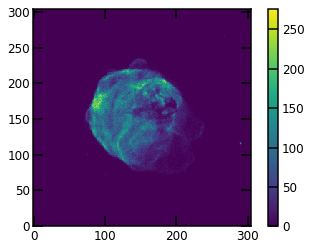

In [20]:
# display image: 
plt.imshow(brd[0].data)
plt.colorbar()

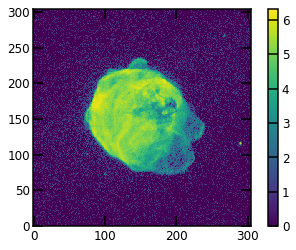

In [21]:
# alternative stretch of image (arc hyperbolic sine):
plt.imshow(np.arcsinh(brd[0].data))
plt.colorbar()

### Make a series of narrowband images

In [22]:
# defining desired energy bounds: 
energy_ranges = np.array([300,700,1000,3000,8000])

# we will use energy_ranges[i] to energy_ranges[i+1] for each band 

In [23]:
# test drive a loop to generate energy-filtered images: 
for i in range(len(energy_ranges)-1): 
    print(filename+'[sky={0}]'.format(myregion)+"[energy={0}:{1}][bin x=::1,y=::1]".format(energy_ranges[i],energy_ranges[i+1]))
    print("n63a_{0}{1}_crp_img.fits".format(energy_ranges[i],energy_ranges[i+1]))

777/repro/acisf00777_repro_evt2.fits[sky=rotbox(5:35:43.8489,-66:02:11.423,2.5',2.5',0)][energy=300:700][bin x=::1,y=::1]
n63a_300700_crp_img.fits
777/repro/acisf00777_repro_evt2.fits[sky=rotbox(5:35:43.8489,-66:02:11.423,2.5',2.5',0)][energy=700:1000][bin x=::1,y=::1]
n63a_7001000_crp_img.fits
777/repro/acisf00777_repro_evt2.fits[sky=rotbox(5:35:43.8489,-66:02:11.423,2.5',2.5',0)][energy=1000:3000][bin x=::1,y=::1]
n63a_10003000_crp_img.fits
777/repro/acisf00777_repro_evt2.fits[sky=rotbox(5:35:43.8489,-66:02:11.423,2.5',2.5',0)][energy=3000:8000][bin x=::1,y=::1]
n63a_30008000_crp_img.fits


In [24]:
# looks good, let's use it: 
for i in range(len(energy_ranges)-1): 
    myinfile=filename+'[sky={0}]'.format(myregion)+\
     "[energy={0}:{1}]".format(energy_ranges[i],energy_ranges[i+1])
    dmcopy(infile=myinfile+'[bin x=::1,y=::1]',
           outfile="n63a_{0}{1}_crp_img.fits".format(energy_ranges[i],energy_ranges[i+1]),
           clobber=True)

In [25]:
ls -tr n63a*

n63a_brd_cropped_evt2.fits  n63a_7001000_crp_img.fits
n63a_brd_cropped_img.fits   n63a_10003000_crp_img.fits
n63a_300700_crp_img.fits    n63a_30008000_crp_img.fits


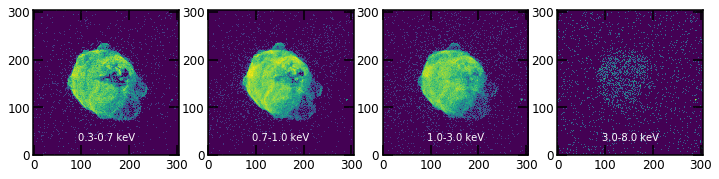

In [26]:
plt.figure(figsize=(12,4))
for i in range(len(energy_ranges)-1):
    this_fits = fits.open("n63a_{0}{1}_crp_img.fits".format(energy_ranges[i],energy_ranges[i+1]))
    this_image = this_fits[0].data
    plt.subplot(1,4,i+1)
    plt.imshow(np.arcsinh(this_image))
    plt.annotate("{0:0.1f}-{1:0.1f} keV".format(energy_ranges[i]/1e3,energy_ranges[i+1]/1e3),
                 xy=(0.5,0.1),xycoords='axes fraction',color='w',ha='center')

### Smoothing images

We smooth an image to reduce the noise, enhance low surface brightness features, and for image processing. 

Smoothing can be done through a variety of methods: 
 - aconvolve: linear convolution with a kernel of your choosing 
 - csmooth: background-aware multi-scale smoothing
 - astropy.convolution: linear convolution with kernel of your choosing
 
Many other examples of kernels, methods, and examples are available here: 
 - http://cxc.harvard.edu/ciao/gallery/smooth.html

In [27]:
# using aconvolve 
aconvolve(infile='n63a_300700_crp_img.fits',
          outfile='n63a_300700_crp_smimg.fits',
          kernelspec='lib:gaus(2,5,1,3,3)',clobber=True)

From: http://cxc.harvard.edu/ciao/ahelp/aconvolve.html

<pre>
gaus

A multi-dimensional, non-rotated Gaussian. The parameters are (D, M, N, S1, S2, ... SD) where:

D = number of dimensions
M = number of sigma to extend in each direction
N = normalization
S1-SD = size of sigma d in pixels in each direction (s1 = size of 1 sigma in pixels in each direction, s2 is size of 2 sigma in pixels, etc.)
</pre>

In [28]:
# load the two images: 
img = fits.open('n63a_300700_crp_img.fits')
smimg = fits.open('n63a_300700_crp_smimg.fits')

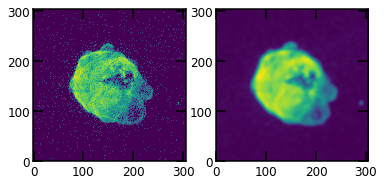

In [29]:
# display the original and the smoothed image 
plt.subplot(1,2,1)
plt.imshow(np.arcsinh(img[0].data))
plt.subplot(1,2,2)
plt.imshow(np.arcsinh(smimg[0].data))

In [30]:
# in the previous example, we used native ACIS pixels (bin x=::1 y=::1). 
# but smoothing reduces resolution, so we could use subpixels then smooth. 
myinfile=filename+'[sky={0}]'.format(myregion)+\
    "[energy={0}:{1}]".format(300,700)
dmcopy(infile=myinfile+'[bin x=::0.25,y=::0.25]',
    outfile="n63a_{0}{1}_crp_subpix_img.fits".format(300,700),
    clobber=True)
aconvolve(infile='n63a_300700_crp_subpix_img.fits',
          outfile='n63a_300700_crp_subpix_smimg.fits',
          kernelspec='lib:gaus(2,5,1,3,3)',clobber=True)

In [31]:
# load the two images: 
img_subpix = fits.open('n63a_300700_crp_subpix_img.fits')
smimg_subpix = fits.open('n63a_300700_crp_subpix_smimg.fits')

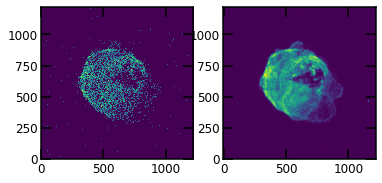

In [32]:
# display the original and the smoothed subpixel binned images
plt.subplot(1,2,1)
plt.imshow(np.arcsinh(img_subpix[0].data))
plt.subplot(1,2,2)
plt.imshow(np.arcsinh(smimg_subpix[0].data))

(200, 1000)

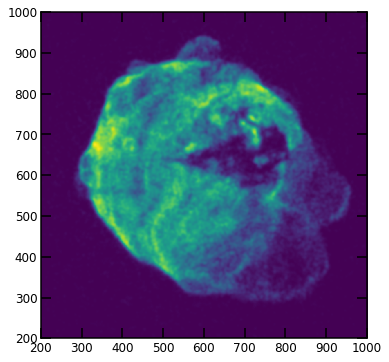

In [33]:
# let's see that bigger!
plt.figure(figsize=(6,6))
plt.imshow(np.arcsinh(smimg_subpix[0].data))
plt.xlim(200,1000)
plt.ylim(200,1000)

### An Aside: What are the units on the axes? 

Presently, when we use imshow, we simply get the pixel numbers for axes labels. 

Better representation comes from the sky offsets in some astronomically-meaningful units. 

To portray these images, we have to access the world coordinate system (WCS) information stored in the images. 

In [34]:
from astropy.wcs import WCS

In [35]:
smimg_subpix_wcs = WCS(smimg_subpix[0].header)

In [36]:
smimg_subpix_wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 83.962680447461  -66.019855577906  
CRPIX : 253.90964473062  1097.68210431  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -3.4166666666667e-05  3.4166666666667e-05  
NAXIS : 1220  1220

In [37]:
# cdelt is the plate scale (degrees per pixel)
platescale = np.array(smimg_subpix_wcs.wcs.cdelt)
print(platescale)
# but arcseconds per pixel is more relevant here: 
platescale = platescale*3600. 
print(platescale)

[-3.41666667e-05  3.41666667e-05]
[-0.123  0.123]


In [38]:
# The images wcs method has a useful tool for converting RA,DEC to pixel location 
ra,dec = 83.93270375,-66.03650639 # here I am giving the position is decimal degrees
pixpos = np.squeeze(smimg_subpix_wcs.all_world2pix([[ra,dec]],0))
# squeeze is needed above to get rid of empty dimension in array
print(pixpos)

# visaversa, an image pixel coordinate can be converted to RA,Dec with wcs.all_pix2world(...)

[609.25609755 609.25606504]


In [39]:
# new we want to calculate the bounds of our image from its size, 
# central position (pixpos), and then convert to offsets in arcseconds 
imgsz = np.array(smimg_subpix[0].data.shape)
print(imgsz)
x1,y1 = (pixpos-imgsz)*platescale
x2,y2 = (imgsz-pixpos)*platescale

[1220 1220]


Text(0.05,0.95,'N63A')

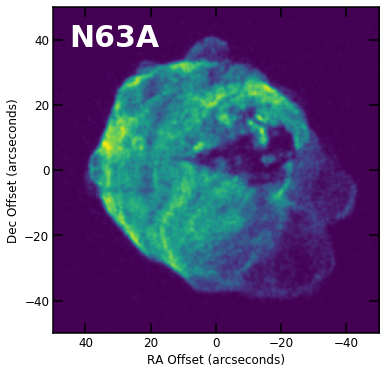

In [40]:
# now we can use the bounds in an imshow in the extent keyword
# *** WARNING: extent is a keyword that must be used very carefully ***
plt.figure(figsize=(6,6))
plt.imshow(np.arcsinh(smimg_subpix[0].data),extent=[x1,x2,y1,y2])
plt.xlabel('RA Offset (arcseconds)')
plt.ylabel('Dec Offset (arcseconds)')
plt.xlim(50,-50)
plt.ylim(-50,50)
plt.annotate('N63A',
             xy=(0.05,0.95),xycoords='axes fraction',
             ha='left',va='top',
             color='w',fontsize=30,fontweight='bold')

In [41]:
# Nice.  Let's make a function to do that offset business calculation.
from astropy.wcs import WCS

def get_extent(imghdu,radec):
    " get_extent - calculates the extend keyword for an imghdu and radec position. "
    wcs = WCS(imghdu.header)
    pltscl = np.array(wcs.wcs.cdelt)*3600.0
    imgsz = np.array(imghdu.data.shape)
    pixpos = np.squeeze(wcs.all_world2pix([[radec[0],radec[1]]],0))
    x1,y1 = (pixpos-imgsz)*pltscl
    x2,y2 = (imgsz-pixpos)*pltscl
    return [x1,x2,y1,y2]    

In [42]:
get_extent(smimg_subpix[0],[83.93270375,-66.03650639])

[75.12150000188508, -75.12150000188508, -75.12150400006506, 75.12150400006506]

Text(0.05,0.95,'N63A')

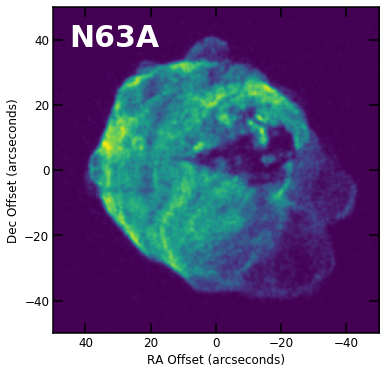

In [43]:
plt.figure(figsize=(6,6))
plt.imshow(np.arcsinh(smimg_subpix[0].data),
           extent=get_extent(smimg_subpix[0],[83.93270375,-66.03650639]))
plt.xlabel('RA Offset (arcseconds)')
plt.ylabel('Dec Offset (arcseconds)')
plt.xlim(50,-50)
plt.ylim(-50,50)
plt.annotate('N63A',
             xy=(0.05,0.95),xycoords='axes fraction',
             ha='left',va='top',
             color='w',fontsize=30,fontweight='bold')

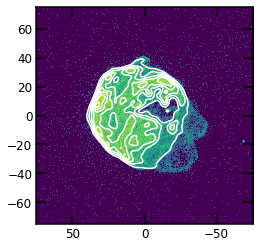

In [44]:
# we this tool, contours become a breeze: 
plt.imshow(np.arcsinh(img[0].data),extent=get_extent(img[0],[83.93270375,-66.03650639]))
plt.contour(smimg[0].data,colors='w',extent=get_extent(smimg[0],[83.93270375,-66.03650639]))

### Multiwavelength Imaging

X-rays are the best! But... Hubble has some okay images. 

This supernova remnant, N63A, also known more appropriately as, "LMC N63A" can be found on the Hubble Legacy Archive: 

 - https://hla.stsci.edu
 
in many narrow band images. From the search results I've downloaded the following narrow band WFPC2 images: 
 - H-alpha, Filter F656N 
 - Doubly-ionized Oxygen, Filter F502N 

In [45]:
# first things first, let's crop the images to the box we used for the Chandra observation: 
print(myregion)

rotbox(5:35:43.8489,-66:02:11.423,2.5',2.5',0)


In [46]:
dmcopy(infile='hst_06698_03_wfpc2_f656n_wf_sci.fits'+"[(x,y)={0}]".format(myregion),
      outfile='n63a_halpha.fits',clobber=True)       
dmcopy(infile='hst_08110_04_wfpc2_f502n_wf_sci.fits'+"[(x,y)={0}]".format(myregion),
      outfile='n63a_oxygen.fits',clobber=True) 

In [47]:
ha = fits.open('n63a_halpha.fits')
oiii = fits.open('n63a_oxygen.fits')
print(ha.info())
print(oiii.info())

Filename: n63a_halpha.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     129   (1501, 1501)   float32   
None
Filename: n63a_oxygen.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     129   (1501, 1501)   float32   
None


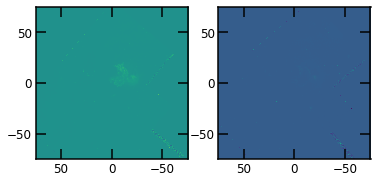

In [48]:
plt.subplot(1,2,1)
plt.imshow(np.arcsinh(ha[0].data),extent=get_extent(ha[0],[83.93270375,-66.03650639]))
plt.subplot(1,2,2)
plt.imshow(np.arcsinh(oiii[0].data),extent=get_extent(oiii[0],[83.93270375,-66.03650639]))

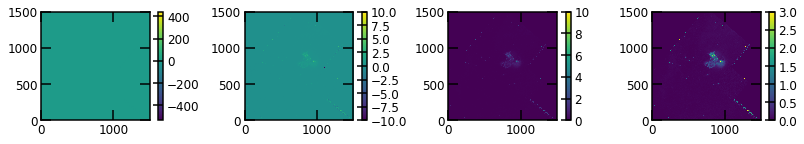

In [49]:
# optical observations, ain't as clean as those low background Chandra observations. 
# roll up the sleeves, were going to try to clean 
plt.figure(figsize=(14,2))
plt.subplot(1,4,1)
plt.imshow(ha[0].data)
plt.colorbar()
plt.subplot(1,4,2)
plt.imshow(ha[0].data,vmin=-10,vmax=10)
plt.colorbar()
plt.subplot(1,4,3)
plt.imshow(ha[0].data,vmin=0,vmax=10)
plt.colorbar()
plt.subplot(1,4,4)
plt.imshow(ha[0].data,vmin=0,vmax=3)
plt.colorbar()

Text(0.05,0.95,'N63A')

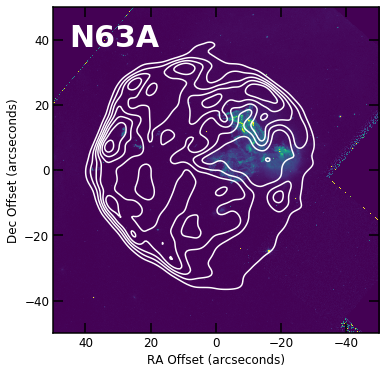

In [50]:
# ok...
plt.figure(figsize=(6,6))
plt.imshow(ha[0].data,extent=get_extent(ha[0],[83.93270375,-66.03650639]),vmin=0,vmax=3)
plt.contour(smimg[0].data,colors='w',extent=get_extent(smimg[0],[83.93270375,-66.03650639]))
plt.xlabel('RA Offset (arcseconds)')
plt.ylabel('Dec Offset (arcseconds)')
plt.xlim(50,-50)
plt.ylim(-50,50)
plt.annotate('N63A',
             xy=(0.05,0.95),xycoords='axes fraction',
             ha='left',va='top',
             color='w',fontsize=30,fontweight='bold')

In [51]:
# let's flip that and reverse it... 
aconvolve(infile='n63a_halpha.fits',
          outfile='n63a_halpha_smimg.fits',
          kernelspec='lib:gaus(2,5,1,5,5)',clobber=True)

In [52]:
smha = fits.open('n63a_halpha_smimg.fits')
print(smha.info())

Filename: n63a_halpha_smimg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     164   (1501, 1501)   float32   
None


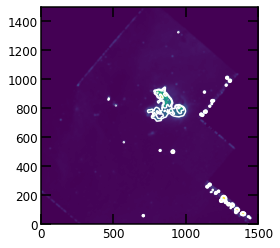

In [53]:
plt.imshow(smha[0].data,vmin=0,vmax=2)
plt.contour(smha[0].data,levels=[0.5,0.75,1.5],colors='w')

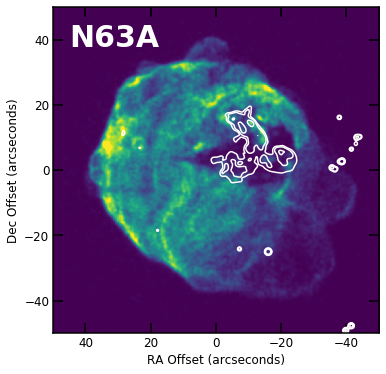

In [54]:
plt.figure(figsize=(6,6))
plt.imshow(smimg_subpix[0].data,extent=get_extent(smimg_subpix[0],[83.93270375,-66.03650639]),vmin=0,vmax=3)
plt.contour(smha[0].data,colors='w',extent=get_extent(smha[0],[83.93270375,-66.03650639]),levels=[0.5,0.75,1.5])
plt.xlabel('RA Offset (arcseconds)')
plt.ylabel('Dec Offset (arcseconds)')
plt.xlim(50,-50)
plt.ylim(-50,50)
plt.annotate('N63A',
             xy=(0.05,0.95),xycoords='axes fraction',
             ha='left',va='top',
             color='w',fontsize=30,fontweight='bold');